In [29]:
import pandas as pd
import numpy as np
import nest_asyncio

nest_asyncio.apply()

data = {
    'Time': [f"01:{i:02d}" for i in np.linspace(2,55,10,dtype=int)],
    'Altitude': [1000 - 50*i for i in (np.random.rand(10)*10-10)],  # 1000, 950, …, 550
    'Warnings': [
        'None', 'Low Altitude', 'Low Altitude', 'Terrain Ahead', 'Pull Up',
        'None', 'Engine Check', 'Turbulence', 'High G-Force', 'None'
    ],
    'Alerts': [
        'None', 'None', 'Caution', 'Warning', 'Critical',
        'None', 'Caution', 'Warning', 'Critical', 'None'
    ],
    'Acceleration': [0.2, 0.3, -0.1, -0.4, -1.2, 0.0, 0.5, -0.3, -0.8, 0.1],
    'Voice Recording': ["Gear down, flaps fifteen", "Cleared for takeoff, runway 36", "Airspeed alive, rotate", "Positive rate, gear up", "Climbing to flight level three six zero", "Contact departure, frequency one two four point three", "Descending to one zero thousand feet", "Traffic in sight, twelve o'clock", "Approaching minimums, decision altitude", "Landing checklist complete, welcome home"],

    }

df_black_box = pd.DataFrame(data)
df_black_box['Tail#'] = 'N123AA'
df_black_box['PlaneID'] = 'B737-456'

df_black_box.head()


,Time,Altitude,Warnings,Alerts,Acceleration,Voice Recording,Tail#,PlaneID
0,01:02,1233.084283,None,None,0.2,"Gear down, flaps fifteen",N123AA,B737-456
1,01:07,1189.345998,Low Altitude,None,0.3,"Cleared for takeoff, runway 36",N123AA,B737-456
2,01:13,1269.964291,Low Altitude,Caution,-0.1,"Airspeed alive, rotate",N123AA,B737-456
3,01:19,1298.548018,Terrain Ahead,Warning,-0.4,"Positive rate, gear up",N123AA,B737-456
4,01:25,1203.114852,Pull Up,Critical,-1.2,Climbing to flight level three six zero,N123AA,B737-456


In [30]:

# Maintenance log data
data = {
    'Date': [
        '2020-04-10', '2018-03-22', '1993-04-01', '2010-03-05', '2014-04-18',
        '2007-03-30', '2011-04-07', '2016-03-15', '1991-04-12', '1998-03-28'
    ],
    'Plane model': [
        'A320-200', 'B737-800', 'B777-300', 'A380-800', 'B787-9',
        'A350-900', 'B737-800', 'A320-200', 'B787-9', 'A380-800'

    ],
    'Tail#': [
        'N123AA', 'N456BB', 'N123AA', 'N789CC',
        'N456BB', 'N321DD', 'N654EE', 'N789CC',
        'N321DD', 'N654EE'
    ],
    'Flight hours & cycle counts': [
        '1500h / 480c', '2300h / 620c', '5400h / 1020c', '8200h / 1450c', '4200h / 900c',
        '3100h / 750c', '2600h / 680c', '1800h / 510c', '3900h / 850c', '7900h / 1400c'
    ],
    'Visual walk-around': [
        'OK', 'Minor FOD', 'OK', 'Leaking panel', 'OK',
        'Tire wear', 'OK', 'Loose hinge', 'OK', 'OK'
    ],
    'Fluid levels': [
        'Oil: 78%, Hydraulic: 82%', 'Oil: 85%, Hydraulic: 80%', 'Oil: 76%, Hydraulic: 79%',
        'Oil: 88%, Hydraulic: 90%', 'Oil: 81%, Hydraulic: 85%', 'Oil: 80%, Hydraulic: 83%',
        'Oil: 77%, Hydraulic: 78%', 'Oil: 83%, Hydraulic: 88%', 'Oil: 79%, Hydraulic: 81%',
        'Oil: 86%, Hydraulic: 89%'
    ],
    'Engine trend parameters': [
        'N1: 98.5%, EGT: 650°C', 'N1: 99.0%, EGT: 670°C', 'N1: 97.5%, EGT: 640°C',
        'N1: 99.2%, EGT: 680°C', 'N1: 98.0%, EGT: 660°C', 'N1: 98.8%, EGT: 670°C',
        'N1: 97.8%, EGT: 645°C', 'N1: 99.1%, EGT: 675°C', 'N1: 98.2%, EGT: 655°C',
        'N1: 99.3%, EGT: 685°C'
    ]
}

# Create DataFrame
df_maintenance = pd.DataFrame(data)


In [31]:

# Recreate the flight_outcomes_df
data = {
    'FlightID': [
        'FL1001-2025-04-01-N123AA', 'FL1002-2025-04-02-N456BB',
        'FL1003-2025-04-03-N123AA', 'FL1004-2025-04-04-N789CC',
        'FL1005-2025-03-28-N456BB', 'FL1006-2025-04-05-N321DD',
        'FL1007-2025-04-06-N654EE', 'FL1008-2025-03-30-N789CC',
        'FL1009-2025-04-07-N321DD', 'FL1010-2025-04-08-N654EE'
    ],
    'Date': [
        '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04',
        '2025-03-28', '2025-04-05', '2025-04-06', '2025-03-30',
        '2025-04-07', '2025-04-08'
    ],
    'Tail#': [
        'N123AA', 'N456BB', 'N123AA', 'N789CC',
        'N456BB', 'N321DD', 'N654EE', 'N789CC',
        'N321DD', 'N654EE'
    ],
    'Outcome': [
        'Normal', 'Incident', 'Normal', 'Accident',
        'Normal', 'Incident', 'Normal', 'Incident',
        'Normal', 'Accident'
    ]
}

df_flight_outcome = pd.DataFrame(data)

# Convert Date column to datetime
df_flight_outcome['Date'] = pd.to_datetime(df_flight_outcome['Date'])



In [32]:
from IPython.display import display

display(
    df_flight_outcome.head(),
    df_black_box.head(),
    df_maintenance.head()
)


,FlightID,Date,Tail#,Outcome
0,FL1001-2025-04-01-N123AA,2025-04-01,N123AA,Normal
1,FL1002-2025-04-02-N456BB,2025-04-02,N456BB,Incident
2,FL1003-2025-04-03-N123AA,2025-04-03,N123AA,Normal
3,FL1004-2025-04-04-N789CC,2025-04-04,N789CC,Accident
4,FL1005-2025-03-28-N456BB,2025-03-28,N456BB,Normal


,Time,Altitude,Warnings,Alerts,Acceleration,Voice Recording,Tail#,PlaneID
0,01:02,1233.084283,None,None,0.2,"Gear down, flaps fifteen",N123AA,B737-456
1,01:07,1189.345998,Low Altitude,None,0.3,"Cleared for takeoff, runway 36",N123AA,B737-456
2,01:13,1269.964291,Low Altitude,Caution,-0.1,"Airspeed alive, rotate",N123AA,B737-456
3,01:19,1298.548018,Terrain Ahead,Warning,-0.4,"Positive rate, gear up",N123AA,B737-456
4,01:25,1203.114852,Pull Up,Critical,-1.2,Climbing to flight level three six zero,N123AA,B737-456


,Date,Plane model,Tail#,Flight hours & cycle counts,Visual walk-around,Fluid levels,Engine trend parameters
0,2020-04-10,A320-200,N123AA,1500h / 480c,OK,"Oil: 78%, Hydraulic: 82%","N1: 98.5%, EGT: 650°C"
1,2018-03-22,B737-800,N456BB,2300h / 620c,Minor FOD,"Oil: 85%, Hydraulic: 80%","N1: 99.0%, EGT: 670°C"
2,1993-04-01,B777-300,N123AA,5400h / 1020c,OK,"Oil: 76%, Hydraulic: 79%","N1: 97.5%, EGT: 640°C"
3,2010-03-05,A380-800,N789CC,8200h / 1450c,Leaking panel,"Oil: 88%, Hydraulic: 90%","N1: 99.2%, EGT: 680°C"
4,2014-04-18,B787-9,N456BB,4200h / 900c,OK,"Oil: 81%, Hydraulic: 85%","N1: 98.0%, EGT: 660°C"


In [33]:
import re

def extract_numerical_values(df):
    # Extract Flight hours and Cycle counts
    df[['Flight hours', 'Cycle']] = df['Flight hours & cycle counts'].str.extract(r'(\d+)h\s*/\s*(\d+)c').astype(int)

    # Extract N1 and EGT
    df[['N1', 'EGT']] = df['Engine trend parameters'].str.extract(r'N1:\s*(\d+\.?\d*)%,\s*EGT:\s*(\d+)°C').astype(float)

    # Select only numerical columns
    numerical_df = df[['Flight hours', 'Cycle', 'N1', 'EGT']]

    return numerical_df

In [34]:
numerical_df_maintenance = extract_numerical_values(df_maintenance.copy())
numerical_df_maintenance.head()

,Flight hours,Cycle,N1,EGT
0,1500,480,98.5,650.0
1,2300,620,99.0,670.0
2,5400,1020,97.5,640.0
3,8200,1450,99.2,680.0
4,4200,900,98.0,660.0


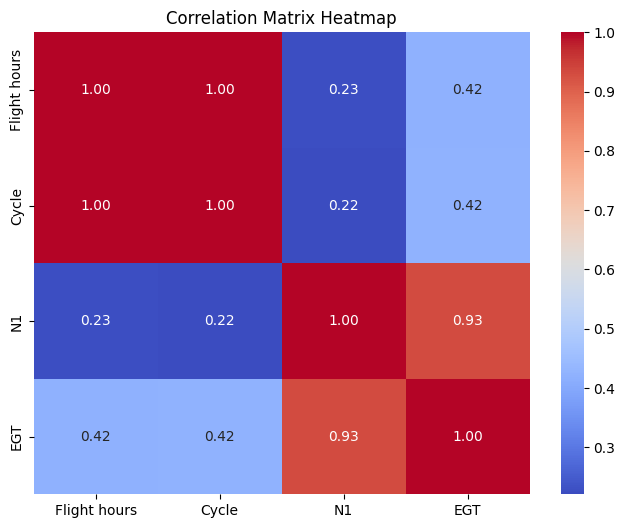

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = numerical_df_maintenance.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [46]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'date': pd.date_range(start='2025-01-01', periods=10, freq='D'),  # Flight dates (initially sorted)
    'Tail#': ['A123', 'B456', 'C789', 'A123', 'B456', 'C789', 'A123', 'B456', 'C789', 'A123'],
    'Flight#': [101, 202, 303, 104, 205, 306, 107, 208, 309, 110],
    'Maintenance_Type': ['Routine', 'Engine_Check', 'Fluid_Refill', 'Routine', 'Engine_Check',
                         'Fluid_Refill', 'Routine', 'Engine_Check', 'Fluid_Refill', 'Routine'],
    'Last_Maintenance_Date': pd.date_range(start='2024-12-25', periods=10, freq='D'),
    'Flight_Hours_Since_Maintenance': [50, 120, 30, 55, 110, 28, 60, 115, 32, 65],
    'Cycle_Count': [500, 1200, 800, 520, 1180, 830, 540, 1160, 860, 560],  # Cumulative engine cycles
    'N1_Fan_Speed': [85.3, 92.1, 88.7, 84.9, 91.5, 87.9, 86.2, 90.8, 89.3, 85.8],  # Fan speed %
    'EGT_Temperature': [700, 750, 720, 710, 740, 730, 705, 745, 725, 715],  # Exhaust gas temp (°C)
    'Outcome': ['Normal', 'Incident', 'Accident', 'Normal', 'Incident', 'Normal', 'Normal', 'Accident', 'Incident', 'Normal']
}

# Create DataFrame
df = pd.DataFrame(data)

# Shuffle the rows randomly while keeping the date column intact
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # random_state ensures reproducibility

# Set 'date' as the index again
df.set_index('date', inplace=True)
df.head()

,Tail#,Flight#,Maintenance_Type,Last_Maintenance_Date,Flight_Hours_Since_Maintenance,Cycle_Count,N1_Fan_Speed,EGT_Temperature,Outcome
date,,,,,,,,,
2025-01-09,C789,309,Fluid_Refill,2025-01-02,32,860,89.3,725,Incident
2025-01-02,B456,202,Engine_Check,2024-12-26,120,1200,92.1,750,Incident
2025-01-06,C789,306,Fluid_Refill,2024-12-30,28,830,87.9,730,Normal
2025-01-01,A123,101,Routine,2024-12-25,50,500,85.3,700,Normal
2025-01-08,B456,208,Engine_Check,2025-01-01,115,1160,90.8,745,Accident
